## 1. Import Libraries
This block imports essential libraries for data manipulation (pandas, numpy), sentiment analysis (TextBlob), statistical correlation (scipy.stats), and visualization (matplotlib, seaborn).

In [ ]:
import pandas as pd
from scipy.stats import pearsonr, spearmanr, kendalltau
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Load News and Stock Data
Loads the processed news sentiment data and Apple's historical stock data from CSV files. Handles file errors and ensures the required files are present.

In [2]:
try:
    # Load the news csv file
    news_df = pd.read_csv('../../data/processed_analyst_ratings.csv')
    # Load Historical Data
    stock_df = pd.read_csv('../../data/yfinance_data/AMZN_historical_data.csv')
except FileNotFoundError:
    print("File not found. Please ensure the path is correct and the file exists.")
    exit(1)
except Exception as e:
    print(f"An error occurred while reading the parquet file: {e}")
    exit(1)

## 3. Convert Date Columns to Datetime
Converts the date columns in both DataFrames to datetime format for accurate merging and time-based analysis.

In [ ]:
news_df['date'] = pd.to_datetime(news_df['date'], format='mixed', utc=True)
stock_df['Date'] = pd.to_datetime(stock_df['Date'], format='mixed', utc=True)

## 4. Merge News and Stock Data
Merges the news and stock DataFrames on the date columns to align sentiment scores with corresponding stock prices.

In [4]:
merged_df = pd.merge(news_df, stock_df, left_on='date', right_on='Date', how='left')

## 5. Inspect Merged Data
Displays the shape and a sample of the merged DataFrame to verify the merge and inspect the data.

In [5]:
merged_df.shape
merged_df.sample(5)

,headline,url,publisher,date,stock,sentiment,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
1178079,Arena Pharma Reports First Patient Dosed In CA...,https://www.benzinga.com/news/19/07/14133303/a...,Benzinga Newsdesk,2019-07-25 00:00:00+00:00,ARNA,0.250000,2019-07-25 00:00:00+00:00,100.050003,100.059998,98.636002,98.691002,98.691002,82730000,0.0,0.0
1196876,Movado Group shares are trading lower after th...,https://www.benzinga.com/markets/wiim/19/08/14...,Benzinga Newsdesk,2019-08-28 00:00:00+00:00,MOV,0.000000,2019-08-28 00:00:00+00:00,87.750000,88.392998,87.202499,88.212502,88.212502,48394000,0.0,0.0
774866,Mid-Afternoon Market Update: Crude Oil Down Ov...,https://www.benzinga.com/news/earnings/16/06/8...,Lisa Levin,2016-06-14 00:00:00+00:00,UAN,-0.201852,2016-06-14 00:00:00+00:00,35.616501,36.040501,35.613499,35.965000,35.965000,50138000,0.0,0.0
1102259,"Stocks Which Set New 52-Week Low Yesterday, Th...",https://www.benzinga.com/news/18/12/12852693/s...,Benzinga Newsdesk,2018-12-14 00:00:00+00:00,EXP,0.068182,2018-12-14 00:00:00+00:00,81.900002,82.128502,79.250000,79.595497,79.595497,127344000,0.0,0.0
635189,Benzinga's Top Initiations,https://www.benzinga.com/analyst-ratings/initi...,Lisa Levin,2015-05-13 00:00:00+00:00,USCR,0.500000,2015-05-13 00:00:00+00:00,21.499001,21.676500,21.290001,21.343500,21.343500,39926000,0.0,0.0


## 6. Handle Missing Values
Checks for missing values in the merged DataFrame, drops any rows with missing data, and displays the new shape.

In [6]:
# Check for missing values
print(merged_df['date'].isnull().sum())
merged_df.dropna(inplace=True)  # Drop missing values if necessary
merged_df.shape

0


(1324417, 15)

## 7. Calculate Daily Returns
Calculates the daily stock return as the percentage change in the closing price and adds it as a new column.

In [7]:
merged_df['daily_return'] = merged_df['Close'].pct_change()  # Calculate daily returns
merged_df.head()

,headline,url,publisher,date,stock,sentiment,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,daily_return
0,Update on the Luxury Sector: 2nd Quarter 2009,https://www.benzinga.com/charles-lewis-sizemor...,Charles Lewis Sizemore CFA,2009-04-27 00:00:00+00:00,Y,0.000000,2009-04-27 00:00:00+00:00,4.1940,4.2490,4.1105,4.1560,4.1560,194118000,0.0,0.0,NaN
1,Update on the Luxury Sector: 2nd Quarter 2009,https://www.benzinga.com/charles-lewis-sizemor...,Charles Lewis Sizemore CFA,2009-04-27 00:00:00+00:00,FT,0.000000,2009-04-27 00:00:00+00:00,4.1940,4.2490,4.1105,4.1560,4.1560,194118000,0.0,0.0,0.000000
2,Going Against the Herd,https://www.benzinga.com/charles-lewis-sizemor...,Charles Lewis Sizemore CFA,2009-04-29 00:00:00+00:00,A,0.000000,2009-04-29 00:00:00+00:00,4.1495,4.1495,3.9630,3.9895,3.9895,194702000,0.0,0.0,-0.040063
3,Charles Sizemore Radio Interview Saturday Morning,https://www.benzinga.com/11218/charles-sizemor...,Charles Lewis Sizemore CFA,2009-05-22 00:00:00+00:00,AM,0.000000,2009-05-22 00:00:00+00:00,3.8050,3.8520,3.7510,3.7820,3.7820,69694000,0.0,0.0,-0.052012
4,MRM a $15-$20+ stock - FIT new information - J...,https://www.benzinga.com/superman/2009/5/27/mr...,superman,2009-05-27 00:00:00+00:00,RF,0.268182,2009-05-27 00:00:00+00:00,3.9255,3.9750,3.8375,3.8550,3.8550,111342000,0.0,0.0,0.019302


## 8. Pearson Correlation Calculation
Drops rows with missing sentiment or daily return values, then calculates and prints the Pearson correlation coefficient and p-value to assess linear correlation.

In [8]:
# Drop missing values before correlation calculation
valid_data = merged_df.dropna(subset=['sentiment', 'daily_return'])

# Pearson correlation (linear relationship)
pearson_corr, pearson_p = pearsonr(valid_data['sentiment'], valid_data['daily_return'])
print(f"Pearson correlation: {pearson_corr}, p-value: {pearson_p}")


Pearson correlation: 0.0010433321127745628, p-value: 0.2298676136758638


## 9. Spearman Correlation Calculation
Calculates and prints the Spearman rank correlation coefficient and p-value to assess monotonic relationships.

In [9]:
# Spearman correlation (monotonic relationship, non-parametric)
spearman_corr, spearman_p = spearmanr(valid_data['sentiment'], valid_data['daily_return'])
print(f"Spearman correlation: {spearman_corr}, p-value: {spearman_p}")


Spearman correlation: 0.0010873599408736168, p-value: 0.21080002376369653


## 10. Kendall Correlation Calculation
Calculates and prints the Kendall tau correlation coefficient and p-value to assess ordinal associations.

In [10]:
# Kendall correlation (ordinal association, non-parametric)
kendall_corr, kendall_p = kendalltau(valid_data['sentiment'], valid_data['daily_return'])
print(f"Kendall correlation: {kendall_corr}, p-value: {kendall_p}")

Kendall correlation: 0.001003099615419878, p-value: 0.21080558081524592


The results show the following correlation values between news sentiment and daily stock return for AMZN:

- **Pearson correlation:** 0.0001 (p-value: 0.2298)
- **Spearman correlation:** 0.00108 (p-value: 0.2108)
- **Kendall correlation:** 0.0010 (p-value: 0.2108)

**Interpretation:**

All three correlation coefficients are extremely close to zero, indicating almost no relationship between news sentiment and daily stock return in the dataset.
The p-values are much greater than 0.05, so these correlations are not statistically significant.

## 11. Scatter Plot of Sentiment vs. Daily Return
Creates a scatter plot to visualize the relationship between news sentiment scores and daily stock returns.

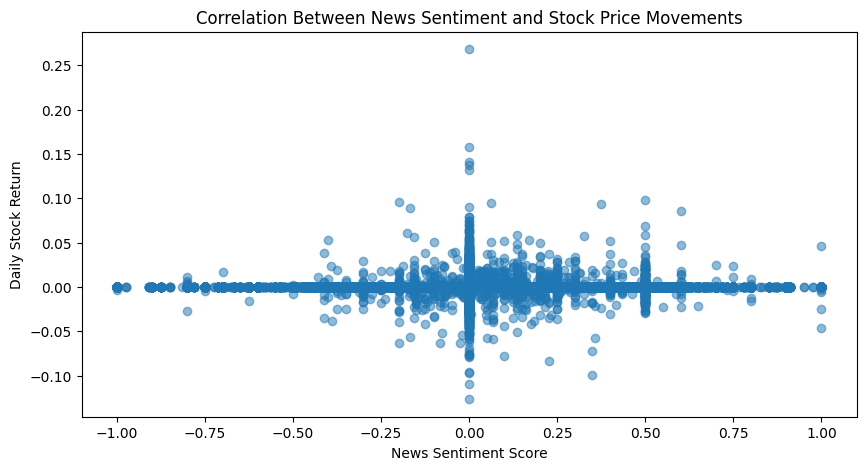

In [11]:
plt.figure(figsize=(10,5))
plt.scatter(valid_data['sentiment'], valid_data['daily_return'], alpha=0.5)
plt.xlabel('News Sentiment Score')
plt.ylabel('Daily Stock Return')
plt.title('Correlation Between News Sentiment and Stock Price Movements')
plt.show()

## 12. Correlation Heatmap
Selects relevant numeric columns, computes the correlation matrix, and visualizes it as a heatmap to show the strength and direction of relationships between variables.

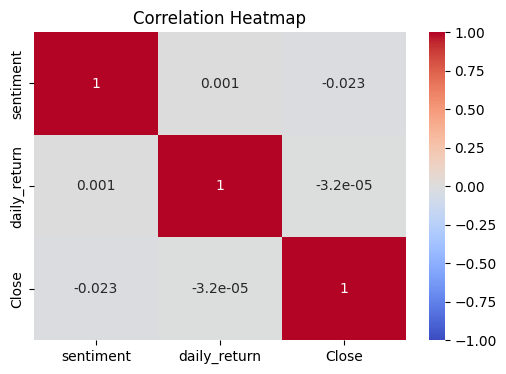

In [12]:
# Select relevant numeric columns for correlation
corr_data = valid_data[['sentiment', 'daily_return', 'Close']]

# Compute correlation matrix
corr_matrix = corr_data.corr(method='pearson')  # You can use 'spearman' or 'kendall' as well

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()